<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer

RANDOM_STATE = 1234

## Подготовка данных

### Изучение данных из файла

In [2]:
data = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date', parse_dates=True)
train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=True)
test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date', parse_dates=True)

**Исходные данные**

In [3]:
data.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

**Обучающая выборка**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

**Тестовая выбоорка**

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

**Согласно документации к данным**

**Технологический процесс**

- `Rougher feed` — исходное сырье

- `Rougher additions (или reagent additions)` — флотационные реагенты: 
Xanthate, Sulphate, Depressant

- `Xanthate **` — ксантогенат (промотер, или активатор флотации);

- `Sulphate` — сульфат (на данном производстве сульфид натрия);

- `Depressant` — депрессант (силикат натрия).

- `Rougher process` (англ. «грубый процесс») — флотация

- `Rougher tails` — отвальные хвосты

- `Float banks` — флотационная установка

- `Cleaner process` — очистка

- `Rougher Au` — черновой концентрат золота

- `Final Au` — финальный концентрат золота

**Параметры этапов**

- `air amount` — объём воздуха

- `fluid levels` — уровень жидкости

- `feed size` — размер гранул сырья

- `feed rate` — скорость подачи

**Этапы**

- `rougher` — флотация

- `primary_cleaner` — первичная очистка

- `secondary_cleaner` — вторичная очистка

- `final` — финальные характеристики

**тип_параметра**

- `input` — параметры сырья

- `output` — параметры продукта

- `state` — параметры, характеризующие текущее состояние этапа

- `calculation` — расчётные характеристики

**Вывод**

Данные представленны в достаточном количестве. В данных несколько признаков содержат пропуски: ...
Несколько признаков отсутвуют в тестовой выборке.
- обучающая выборка от исходной составляет – 73%

- тестовая выборка от исходной составляет – 27% 


### Предобработка данных

**Расчёт эффективности обогащения**

In [7]:
def recovery(row):
# доля золота в концетрате после флотации/очистки
    concentrate = row['rougher.output.concentrate_au']
    
# доля золота в концетрате до флотации/очистки
    feed = row['rougher.input.feed_au']

# доля золота в отвальных хвостах после флотации/очистки
    tails = row['rougher.output.tail_au']
    return (concentrate * (feed - tails)) / (feed * (concentrate - tails)) * 100
calc_recovery = train.apply(recovery, axis=1)    

Расчитаем *MAE* для полученных значений эффективности обогощения `au` и значений признака `rougher.output.recovery`

In [8]:
MAE = mean_absolute_error(train['rougher.output.recovery'], calc_recovery)
print(MAE)

9.73512347450521e-15


**Вывод**

Вычисленная мера ошибок *MAE* очень мала, полученные значения эффективности обогощения `au` практически не отличаются от значений в признаке `rougher.output.recovery`. Следовательно также можно счить, что признак `rougher.output.recovery` – это эффективность обогащения `au`.

***

**Изучение признаков**

Посмотрим какие признаки из обучающей выборки отсутвуют в тестовой

In [9]:
test_col = pd.Series(test.columns)
train_col = pd.Series(train.columns)
columns_not_in_test = train_col[~train_col.isin(test_col)]
train[columns_not_in_test].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

В тестовой выборке отсутствуют 34 признака, из них два целевых: 

`rougher.output.recovery` и `final.output.recovery`. Остальные признаки характерезуют продукт полученный по завершеннию соответствующего этапа, для обучения модели это лишняя интформация. 

In [10]:
# Удаляем признаки 
features_train = train[test_col]

In [11]:
features_train.shape

(14149, 52)

**Дубликаты в данных**

In [12]:
print(data.duplicated().sum())

0


**Обработка пропусков**

Обработка пропусков в обучающей выборке

In [13]:
features_train.isna().sum().sort_values(ascending=False).head(45)

rougher.state.floatbank10_e_air               436
rougher.input.floatbank11_xanthate            428
secondary_cleaner.state.floatbank2_a_air      217
rougher.input.feed_size                       144
rougher.input.feed_pb                         100
primary_cleaner.input.xanthate                100
rougher.input.feed_sol                         78
rougher.input.floatbank11_sulfate              36
primary_cleaner.input.depressant               32
rougher.input.floatbank10_sulfate              29
secondary_cleaner.state.floatbank2_b_air       21
primary_cleaner.input.sulfate                  20
rougher.input.feed_rate                         8
rougher.input.floatbank10_xanthate              8
secondary_cleaner.state.floatbank4_a_air        6
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_b_air          4
secondary_cleaner.state.floatbank3_a_air        4
primary_cleaner.state.floatbank8_d_air          3
secondary_cleaner.state.floatbank6_a_air        2


Удалим все объекты с пропусками:

In [14]:
# features_train = features_train.dropna()
features_train = features_train.fillna(method='ffill')

Обработка пропусков в тестовой выборке:

In [15]:
display(test.isna().sum().sort_values(ascending=False).head(15))
features_test = test.fillna(method='ffill')

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.sulfate                  4
primary_cleaner.input.xanthate                 4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank3_b_level     0
secondary_cleaner.state.floatbank3_b_air       0
rougher.state.floatbank10_f_air                0
dtype: int64

## Анализ данных

**Концентрация металлов (Au, Ag, Pb) на различных этапах очистки**

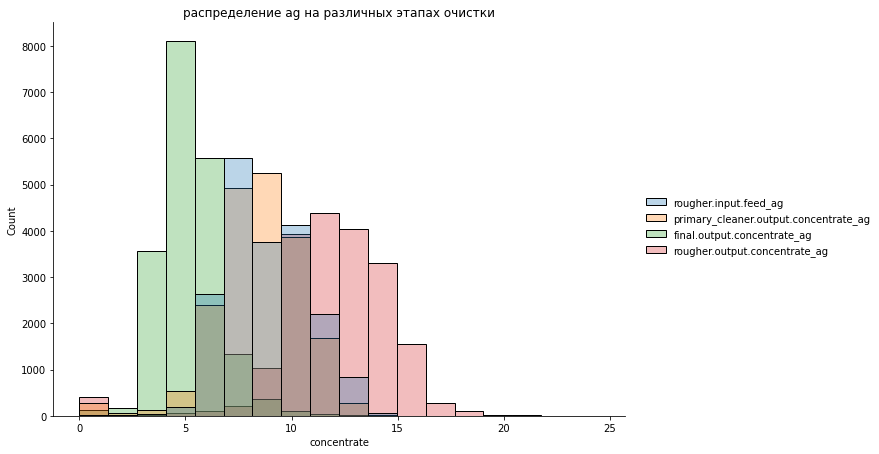

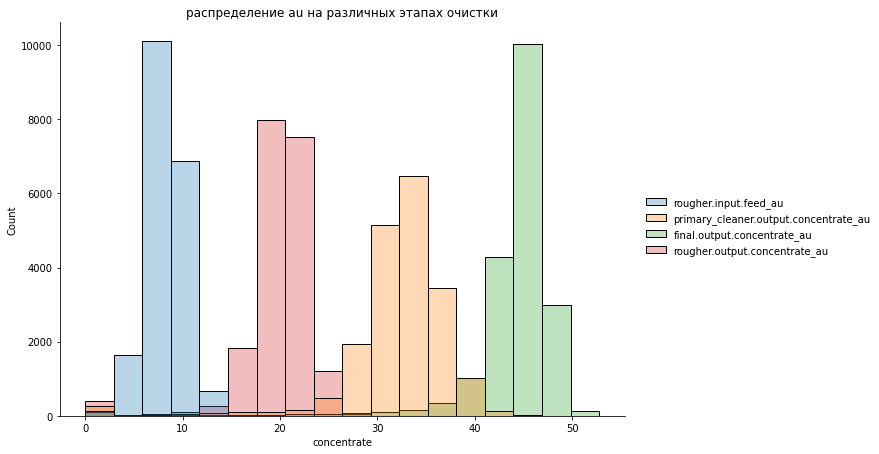

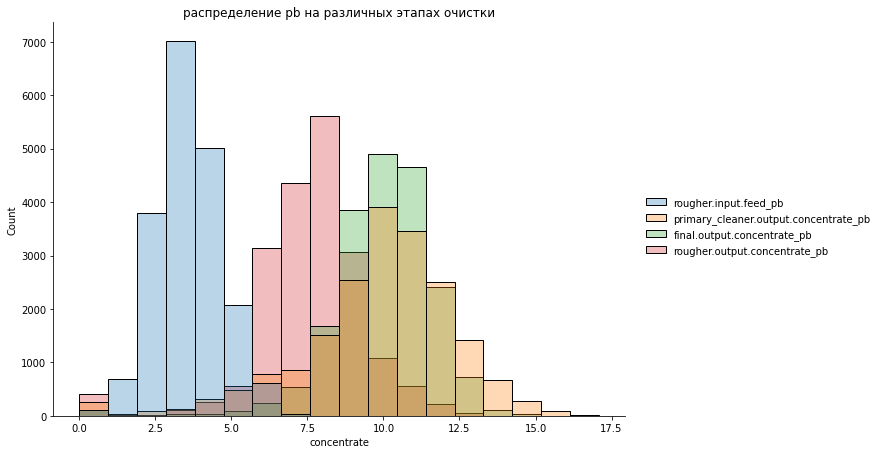

In [16]:
for metal in ['ag', 'au', 'pb']:
    sns.displot(data=data[[f'rougher.input.feed_{metal}', f'primary_cleaner.output.concentrate_{metal}',
                           f'final.output.concentrate_{metal}', f'rougher.output.concentrate_{metal}']], 
            kind='hist', height=6, aspect=1.5, bins=18, alpha=0.3).set(
        title=f'распределение {metal} на различных этапах очистки', xlabel = 'concentrate')
            
    

Из построенных гистограмм распределения видно, что на последнем этапе очистки концентрация золота и свинца начинает преобладать по сравнению с предюдущими этапами очистки. Также можно видеть, что концентрация серебра постепенно уменьшается.

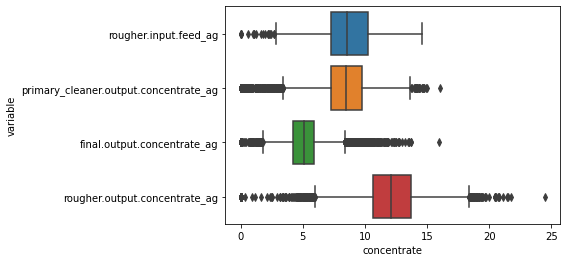

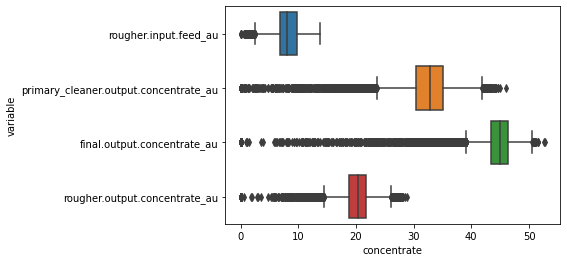

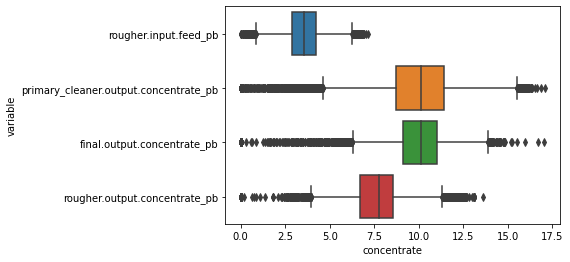

In [17]:
for metal in ['ag', 'au', 'pb']:
    sns.boxplot(y="variable", x="value", data=pd.melt(data[[f'rougher.input.feed_{metal}', f'primary_cleaner.output.concentrate_{metal}',
                           f'final.output.concentrate_{metal}', f'rougher.output.concentrate_{metal}']])
                ).set(xlabel = 'concentrate')
    plt.show()

Построенные диаграммы размаха также подтверждают, что концентрация серебра уменьшается, концентрация золота и свинца увеличивается с каждым этапом очистки. Также можно видеть выбросы.

**Распределение размеров гранул сырья**

[Text(0.5, 1.0, 'test'), Text(0.5, 0, 'size')]

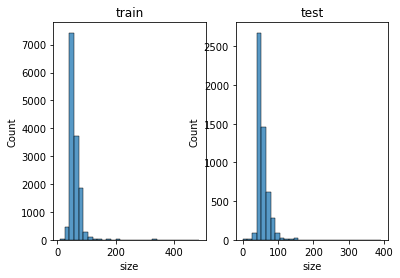

In [18]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data=train['rougher.input.feed_size'], bins=30, ax=axes[0]).set(title='train', xlabel='size')
sns.histplot(data=test['rougher.input.feed_size'], bins=30, ax=axes[1]).set(title='test', xlabel='size')


Распределения гранул сырья на обучающей и на тестовой выборке сходятся.

- Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

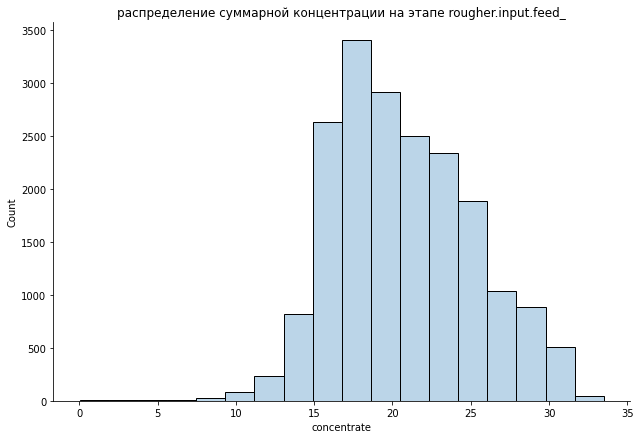

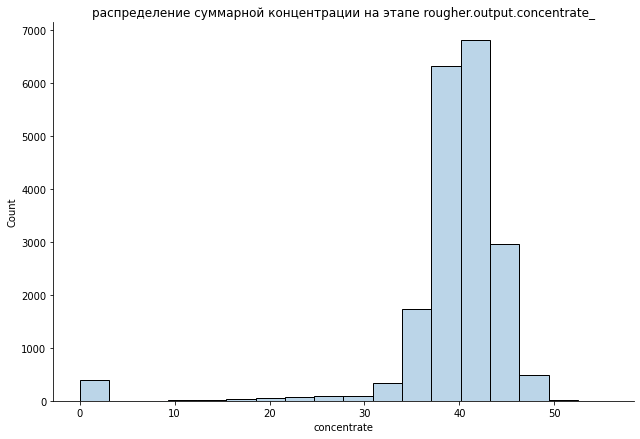

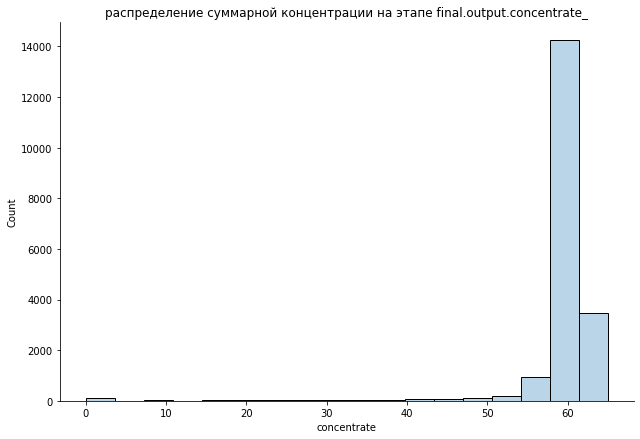

In [19]:
sum_consentrate = 0
for stage in ['rougher.input.feed_', 'rougher.output.concentrate_', 'final.output.concentrate_']:
    for metal in ['ag', 'au', 'pb']:
        sum_consentrate += data[stage + metal]
    sns.displot(data=sum_consentrate, kind='hist', height=6, aspect=1.5, bins=18, alpha=0.3).set(
            title=f'распределение суммарной концентрации на этапе {stage}',
            xlabel='concentrate')
    plt.show()
    sum_consentrate = 0

На построенных графиках распределения суммарной концентрации металлов видно, что на различных этапах обработки руды, в финальном продукте содержится максимальная концентрация. 
***
Также опять видны выбросы и явные нулевые значения уже в сумарной концентрации,так как нулевые значения не привносят вклада в прогназируемые значения удалим их на этапах флотации и финальном:

In [20]:
data['rougher.output.concentrate_au'] = data[data['rougher.output.concentrate_au'] != 0]
data['final.output.concentrate_au'] = data[data['final.output.concentrate_au'] != 0]

## Модель

Функция для расчёта *sMAPE*

In [21]:
def smape(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred))/2
    return (error / scale).mean()*100 
score_smape = make_scorer(smape, greater_is_better=False)

Определение целевых признаков

In [22]:
# Определяем целевые признаки для test
target_rougher_test = data['rougher.output.recovery'].loc[features_test.index]
target_final_test = data['final.output.recovery'].loc[features_test.index]

In [23]:
# Определяем целевые признаки для train
target_rougher_train = train['rougher.output.recovery'].loc[features_train.index]
target_final_train = train['final.output.recovery'].loc[features_train.index]

**Размеры полученных выборок**

In [24]:
print(f"Обучающая выборка {features_train.shape}")
print(f"Тестовая выборка {features_test.shape}")

Обучающая выборка (14149, 52)
Тестовая выборка (5290, 52)


**Кросс-валидация**

In [25]:
def get_cv_scores(model, features, target):
    scores = cross_val_score(
        model,
        features, target,
        cv=5,
        scoring=score_smape
    )
    print('best_score: ', np.mean(scores)*(-1))

**Модель случайного леса**

In [26]:
grid = {'n_estimators': range(5, 50, 10), 'max_depth': range(2, 10, 2)}

In [27]:
model_rfr = RandomForestRegressor(random_state=RANDOM_STATE)
grid_search = GridSearchCV(model_rfr, grid, cv=5, scoring=score_smape)

grid_search.fit(features_train, target_rougher_train)
print("predictions rougher")
print("best parameters:", grid_search.best_params_)
print("best score:", grid_search.best_score_*(-1))

predictions rougher
best parameters: {'max_depth': 6, 'n_estimators': 25}
best score: 11.092159524932132


In [28]:
print("predictions final")
grid_search.fit(features_train, target_final_train)
print("best parameters:", grid_search.best_params_)
print("best score:", grid_search.best_score_*(-1))

predictions final
best parameters: {'max_depth': 4, 'n_estimators': 35}
best score: 10.334694700824627


**Модель линейной регрессии**

In [29]:
lg = LinearRegression().fit(features_train, target_rougher_train)

print("predictions rougher")
get_cv_scores(lg, features_train, target_rougher_train)

predictions rougher
best_score:  12.802483458481934


In [30]:
lg = LinearRegression().fit(features_train, target_final_train)

print("predictions final")
get_cv_scores(lg, features_train, target_final_train)

predictions final
best_score:  12.245300320302457


**Вывод**

По результатам исследования моделей наилучший результат:
- для признака `rougher.output.recovery` показала модель случайного леса **score** = 10.85
- для признака `final.output.recover` показала модель случайного леса **score** = 10.21

**Построение модели на тестовой выборке**

In [31]:
# model = LinearRegression().fit(features_train, target_rougher_train)
model = RandomForestRegressor(n_estimators=25, max_depth=6, random_state=RANDOM_STATE).fit(features_train, target_rougher_train)
predicted_test = model.predict(features_test)

In [32]:
# score rougher
smape_rougher = smape(target_rougher_test, predicted_test)
smape_rougher

10.103408891990778

In [33]:
# model = LinearRegression().fit(features_train, target_final_train)
model = RandomForestRegressor(n_estimators=35, max_depth=4, random_state=RANDOM_STATE).fit(features_train, target_final_train)
predicted_test = model.predict(features_test)

In [34]:
# score final
smape_final = smape(target_final_test, predicted_test)
smape_final

9.43461817313594

**Итоговый *SMAPE***

In [35]:
sMape = .25 * smape_rougher + 0.75 * smape_final
print(f"Итоговый sMAPE: {sMape}")

Итоговый sMAPE: 9.60181585284965


## Итоговый вывод

Проведено исследование данных с параметрами добычи и очистки золотосодержащей руды. Подготовлен протип модели для прогнозирования коэффициента восстановления золота из золотосодержащей руды.
